In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader
import cnn
from dataloader import LargeTrainDataset, LargeTestDataset
from display import *
from learn import test, train

In [85]:
# %%capture
# if not Path('ibug_300W_large_face_landmark_dataset').exists():
#     !wget https://people.eecs.berkeley.edu/~zhecao/ibug_300W_large_face_landmark_dataset.zip
#     !unzip 'ibug_300W_large_face_landmark_dataset.zip'    
#     !rm -r 'ibug_300W_large_face_landmark_dataset.zip'

In [3]:
import xml.etree.ElementTree as ET
DATA_DIR = Path("data")
IBUG_DIR = DATA_DIR / Path('ibug_300W_large_face_landmark_dataset')
train_xml = IBUG_DIR/Path("labels_ibug_300W_train.xml")
test_xml = IBUG_DIR/Path("labels_ibug_300W_test_parsed.xml")

In [4]:
# Initialite Datasets

training_set = LargeTrainDataset(IBUG_DIR, train_xml)
assert len(training_set) == 6666, len(training_set)
validation_set = LargeTestDataset(IBUG_DIR, test_xml)
assert len(validation_set) == 1008, len(validation_set)

# Initialize Dataloaders
batch_size = 250
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

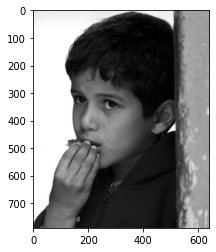

In [5]:
show_keypoints(validation_set[0][0])

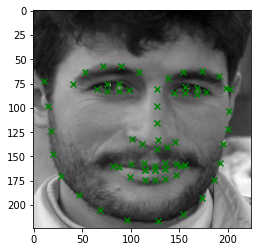

In [6]:
show_keypoints(training_set[2][0], training_set[2][1])

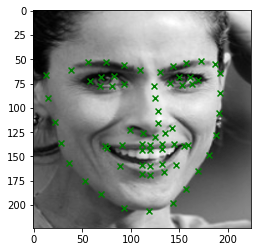

In [7]:
show_keypoints(training_set[134][0], training_set[134][1])

In [8]:
# Training and Testing
import torchvision
epochs = 18
learn_rate = 0.002
show_every = 1
loss_per_epoch = []
model = torchvision.models.resnet18()

for ep in range(epochs):
    print(f"========== Start Epoch {ep} ==========")
    trained_model, train_loss = train(
        train_loader, model, learn_rate
    )
    _, valid_loss = test(test_loader, trained_model, show_every)
    
    print_epoch(ep, train_loss, valid_loss)
    loss_per_epoch.append([train_loss, valid_loss])

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


AttributeError: 'NoneType' object has no attribute 'to'

In [2]:
test(test_loader, trained_model, show_every)

NameError: name 'test' is not defined

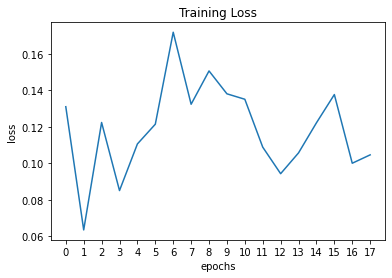

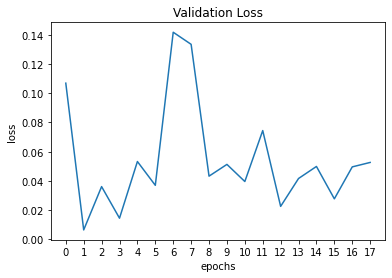

In [134]:
loss_per_epoch = np.array(loss_per_epoch)
show_progress(loss_per_epoch) 

xml.etree.ElementTree.Element

6666


In [ ]:
TOTAL_ROWS = 137088
import torch
import pandas as pd
import numpy as np
training_set[2][1], training_set[134][1] 
x = torch.randn(1)
x_np = x.numpy()
x_df = pd.DataFrame(x_np)
x_df.to_csv('tmp.csv')